In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

### Linear regression with one variable

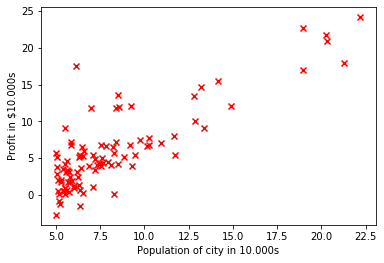

In [75]:
data =  pd.read_csv('ex1data1.txt',header=None)
data.head()
x = data.loc[:,0]
y = data.loc[:,1]

plt.scatter(x,y, c='r', marker='x')
plt.ylabel('Profit in $10.000s')
plt.xlabel('Population of city in 10.000s')

x_d = np.column_stack((np.ones((len(y),1)),x))

In [141]:

def COMPUTECOST(x,y,theta):
    m= len(y)
    yhat = x.dot(theta)
    j = np.sum(np.square(yhat - pd.DataFrame(y)))/(2*m)
    return j 
    
COMPUTECOST(x_d,y,[[0],[0]])

1    32.072734
dtype: float64

In [184]:
def gradientDescent(x,y,theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    for iter in range(num_iters):
        h = x.dot(theta)
        theta[0] = theta[0] - alpha/m * (x[:,0].T.dot(h - pd.DataFrame(y)))
        theta[1] = theta[1] - alpha/m * (x[:,1].T.dot(h - pd.DataFrame(y)))
        J_history[iter] = COMPUTECOST(x,y,theta)
    return (theta, J_history)
        
        
 # theta for minimized cost J
theta , Cost_J = gradientDescent(x_d, y,theta=[[0],[0]], alpha=0.01, num_iters=1500)


[array([-3.63029144]), array([1.16636235])]


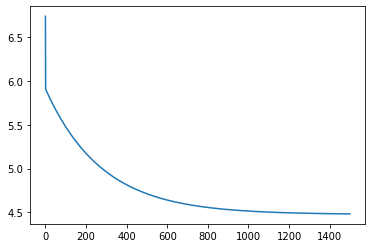

In [185]:
print(theta)  
plt.plot(Cost_J)

[-3.89578088] [[1.19303364]]


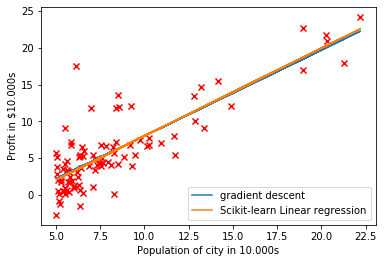

In [220]:
plt.scatter(x,y, c='r', marker='x')
plt.ylabel('Profit in $10.000s')
plt.xlabel('Population of city in 10.000s')
plt.plot(x, x_d.dot(theta), label="gradient descent")


### fit Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(pd.DataFrame(x),pd.DataFrame(y))
print(regr.intercept_,regr.coef_)
yhat = regr.predict(pd.DataFrame(x))

plt.plot(x, yhat, label="Scikit-learn Linear regression")
plt.legend(loc=4);


In [218]:
# Predict profit for a city with population of 35000 and 70000
print(np.array(theta).T.dot([1, 3.5])*10000)
print(np.array(theta).T.dot([1, 7])*10000)


print(regr.predict(pd.DataFrame(data = [3.5]))*10000)
print(regr.predict(pd.DataFrame(data = [7]))*10000)

[4519.7678677]
[45342.45012945]
[[2798.36876352]]
[[44554.54631015]]


### Linear Regression with multiple variables

In [237]:
data =  pd.read_csv('ex1data2.txt',header=None) 
x2 = data.loc[:,0:1]
y2= data.loc[:,2]
m = len(y2)

##  feature normalize
x2_1 = (x2 - np.mean(x2))/np.std(x2)
x2_d = np.column_stack((np.ones((len(y2),1)),x2_1))




In [239]:
J = COMPUTECOST(x2_d,y2,[[0],[0],[0]])
print(J)


2    6.559155e+10
dtype: float64


In [242]:
def gradientDescentMulti(x,y,theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    for iter in range(num_iters):
        h = x.dot(theta)
        theta = theta - alpha/m * (x.T.dot(h - pd.DataFrame(y)))
        
        J_history[iter] = COMPUTECOST(x,y,theta)
    return (theta, J_history)
        
        
 # theta for minimized cost J
theta , Cost_J = gradientDescentMulti(x2_d, y2,theta=[[0],[0],[0]], alpha=0.01, num_iters=400)
print(theta)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]
